# createImageAvailabilityGraphic
Code to create a graphic of available satellite images from several typical satellite-sensors, given a user-defined region and time period of interest.

## 0. Imports

In [13]:
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geemap
import importlib
import ImageAvailabilityVisualisation as viz
importlib.reload(viz)
import ImageAvailabilityInfos as info
importlib.reload(info)

<module 'ImageAvailabilityInfos' from 'C:\\Users\\alexa\\Documents\\GitHub\\satelliteImageAvailability\\ImageAvailabilityInfos.py'>

### Import and authenticate GEE

In [2]:
import ee

In [3]:
ee.Authenticate()

Enter verification code:  4/1AfJohXmQMDHgUBqnXJwASpueMLnD0bY871ZYkIGoaSbtPQ-etkhVxL3XMA8



Successfully saved authorization token.


In [4]:
ee.Initialize()

## 1. Define region and time of interest

### Region of Interest

In [8]:
# Define the region of interest - using shapefile for Rio_Grande
roi = ee.FeatureCollection("users/alex-saunders/houston") # will need to upload shapefile to assets in your own GEE account, or we switch this for shapefile to reside in a earth engine cloud project

# Dissolve to one element
roiDissolved = ee.FeatureCollection(roi_orig.geometry().dissolve())

# Get number of elements in the region of interest file (e.g., could have multiple watersheds / admin areas in the same shapefile)
n = roi.size().getInfo()
nDissolved = roiDissolved.size().getInfo()

### Time of interest
Currently define the "central date" you want to look for and the number of days either side.

If preferred can manually specify start and end date as strings in correct format.

Can provide multiple dates and multiple images will be created.

In [9]:
# Define the dates of interest and the number of days either side of the target date for whcih to create the visualization
dates = ['8/27/2017', '8/15/2021'] # add multiple to search for multiple time periods at once
dates = [datetime.datetime.strptime(item,'%m/%d/%Y') for item in dates]
daysBeforeAfter = 12 # days

### Optional: manually upload a CSV with cloud cover for Planet images, extracted manually from Planet Explorer
Since we know that currently, the Planet data does not return properly using the API (for given dates?), it is sensible to manually create a CSV file of Planet images with their cloud cover and % area coverage from Planet explorer.

In [10]:
planetCSV = 'Z:/media/mule/users/alexsaunders/FloodJusticeData/planet/houston.csv'

## 2. Create graphic of image availability

In [19]:
# Use MODIS AQUA and TERRA, create composite with least cloudy pixel from either AQUA and TERRA, then do reduce region on that

# Separate graph, one with Aqua/Terra and Landsats separated

In [ ]:
planetKey # as variable

S2 : No images for the TOI and ROI
S1 : Success in getting the FilteredCollection with image info
MODIS : Success in getting the FilteredCollection with image info
L7 : Success in getting the FilteredCollection with image info
L8 : Success in getting the FilteredCollection with image info
L9 : No images for the TOI and ROI


C:\Users\alexa\Documents\GitHub\satelliteImageAvailability\ImageAvailabilityVisualisation.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


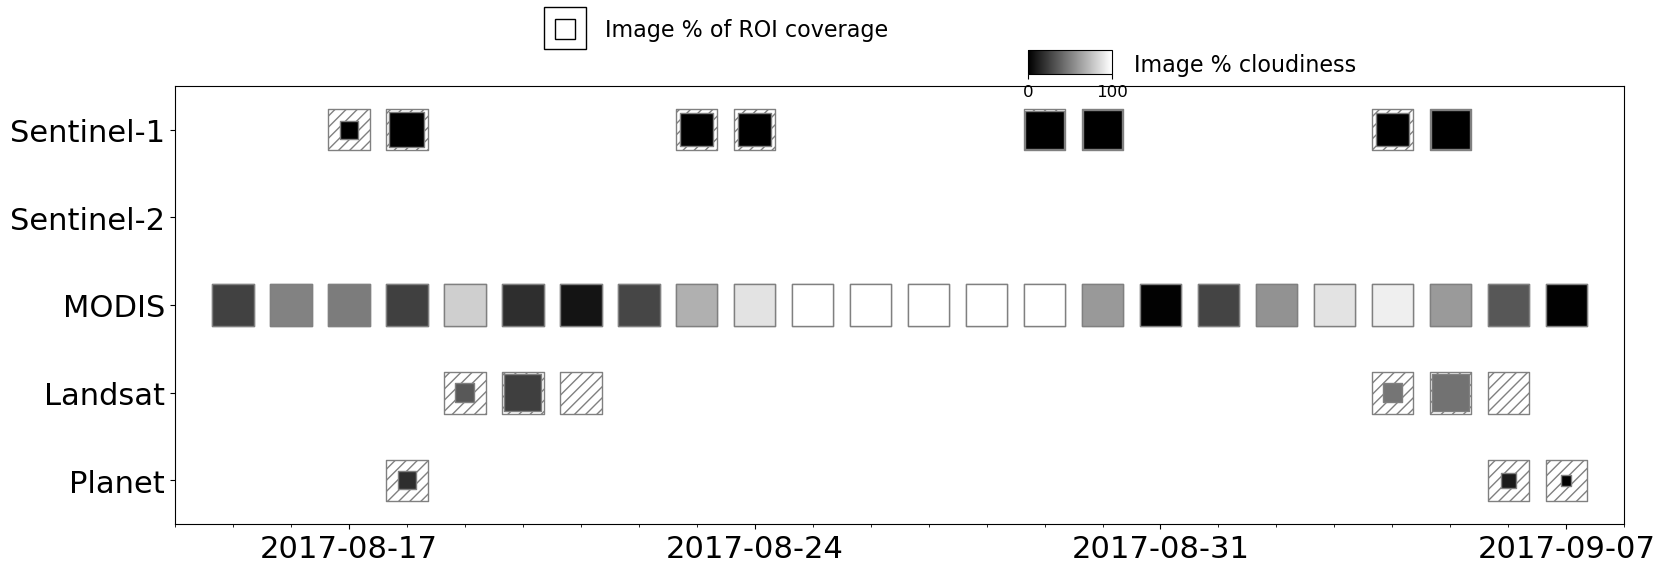

S2 : Success in getting the FilteredCollection with image info
S1 : Success in getting the FilteredCollection with image info
MODIS : Success in getting the FilteredCollection with image info
L7 : Success in getting the FilteredCollection with image info
L8 : Success in getting the FilteredCollection with image info
L9 : No images for the TOI and ROI


C:\Users\alexa\Documents\GitHub\satelliteImageAvailability\ImageAvailabilityVisualisation.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


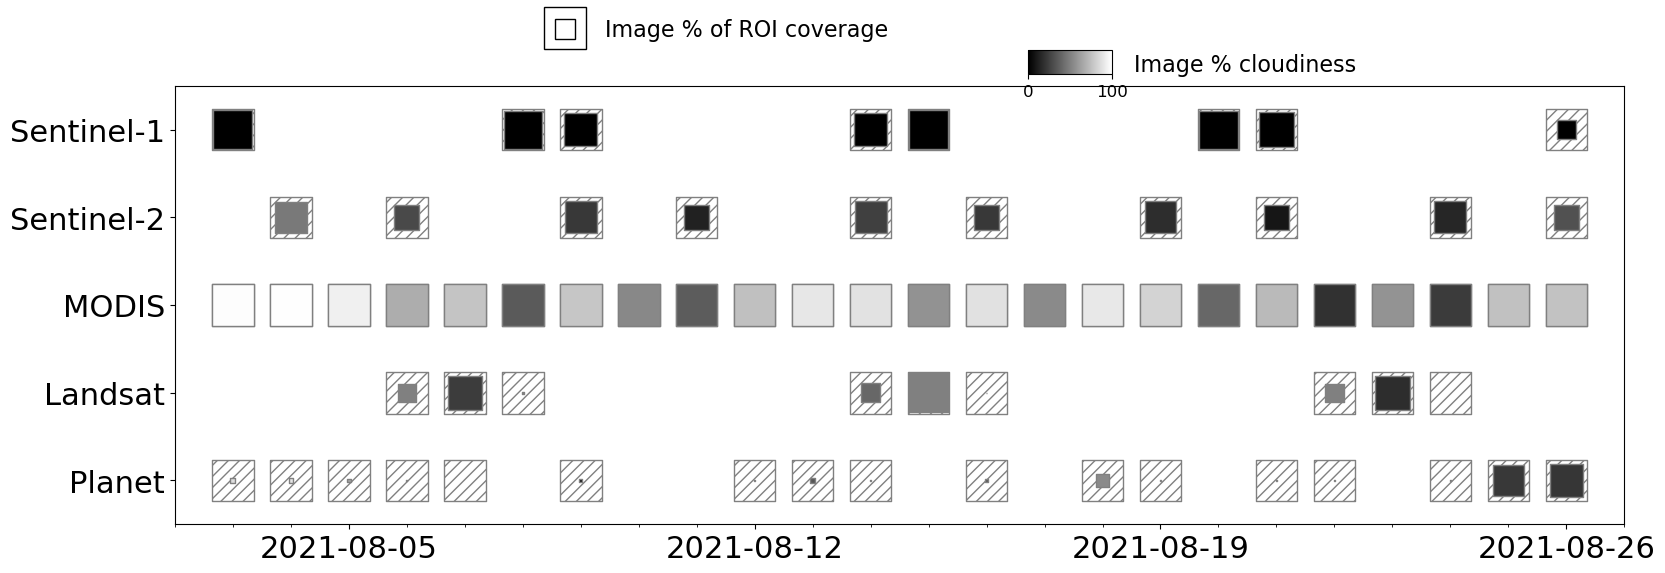

In [15]:
# Loop through event dates
for date in dates:
    
    # Loop through elements of the ROI (if more than one, otherwise will just create a single output for the single ROI)
    for k in range(n): 
        
        # Get geometry as geometry format, from the Feature Collection
        geometry = ee.Feature(roi.toList(n).get(k)).geometry() 
        
        # Create start and end date in required format for GEE search
        startDateStr = (date - timedelta(days=daysBeforeAfter)).strftime('%Y-%m-%d')
        endDateStr = (date + timedelta(days=daysBeforeAfter)).strftime('%Y-%m-%d')
        
        # If you want to use manually defined start and end rather than a central date with a days before / after, specify as string instead
        # startDateStr = '2017-08-01'
        # endDateStr = '2017-09-01'
        
        # Create figure
        # fig = viz.showImageAvailability(startDateStr, endDateStr, geometry, 'PLAK4ce6a11d243242cbb977d14fd9f456ab', planetCSV=None)
        fig = viz.showImageAvailability(startDateStr, endDateStr, geometry, 'PLAK4ce6a11d243242cbb977d14fd9f456ab', planetCSV=None) # use enter location of Planet csv file if want to include it
        # Planet API key: PLAK4ce6a11d243242cbb977d14fd9f456ab
        
        # Save figure to png
        fig.savefig('imageAvailabilityFigure.png')

### NOTE
If you want to get a dataframe of the actual data that creates the graphic, you can run the below

In [16]:
# Get dataframes of info
date_list_df, sentinel2_df, sentinel1_df, modis_terra_df, landsat7_df, landsat8_df, landsat9_df, PlanetInfoDF = info.GetDataFrames(startDateStr, endDateStr, geometry, 'PLAK4ce6a11d243242cbb977d14fd9f456ab')

S2 : Success in getting the FilteredCollection with image info
S1 : Success in getting the FilteredCollection with image info
MODIS : Success in getting the FilteredCollection with image info
L7 : Success in getting the FilteredCollection with image info
L8 : Success in getting the FilteredCollection with image info
L9 : No images for the TOI and ROI


In [17]:
sentinel1_df

,dateTime,pctArea,pctCloud
date,,,
2021-08-03,2021-08-03,93.030258,0.0
2021-08-08,2021-08-08,91.452873,0.0
2021-08-15,2021-08-15,93.021930,0.0
2021-08-20,2021-08-20,91.435826,0.0
2021-08-09,2021-08-09,79.072476,0.0
2021-08-21,2021-08-21,84.948487,0.0
2021-08-14,2021-08-14,79.150550,0.0
2021-08-26,2021-08-26,44.056389,0.0


In [34]:
# See how the Planet availability return is not complete
PlanetInfoDF

,pctArea,pctCloud
date,,
2017-08-18,42.892242,18.162856
2017-09-06,36.208875,10.761334
2017-09-07,24.453000,0.511480
